In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [ ]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#Sex - Gender of patient Male = 1, Female =0
#Age - Age of patient
#Diabetes - 0 = No, 1 = Yes
#Anaemia - 0 = No, 1 = Yes
#High_blood_pressure - 0 = No, 1 = Yes
#Smoking - 0 = No, 1 = Yes
#DEATH_EVENT - 0 = No, 1 = Yes


In [ ]:
data.shape

(299, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data['anaemia'] = pd.Categorical(data['anaemia'])
data['diabetes'] = pd.Categorical(data['diabetes'])
data['high_blood_pressure'] = pd.Categorical(data['high_blood_pressure'])
data['sex'] = pd.Categorical(data['sex'])
data['smoking'] = pd.Categorical(data['smoking'])
data['DEATH_EVENT'] = pd.Categorical(data['DEATH_EVENT'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

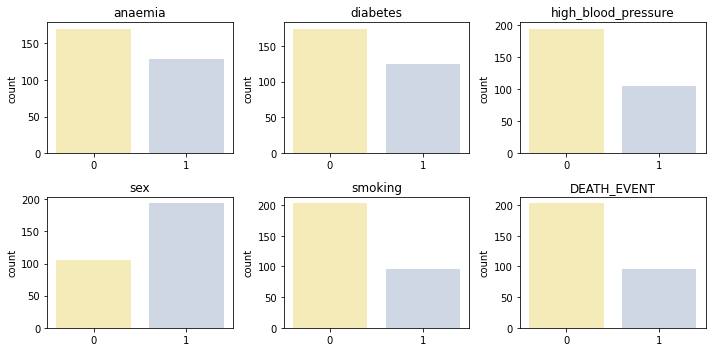

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
titles = list(data.select_dtypes(include='category'))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.countplot(x=title, data=data, palette='Pastel2_r', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')

plt.tight_layout()

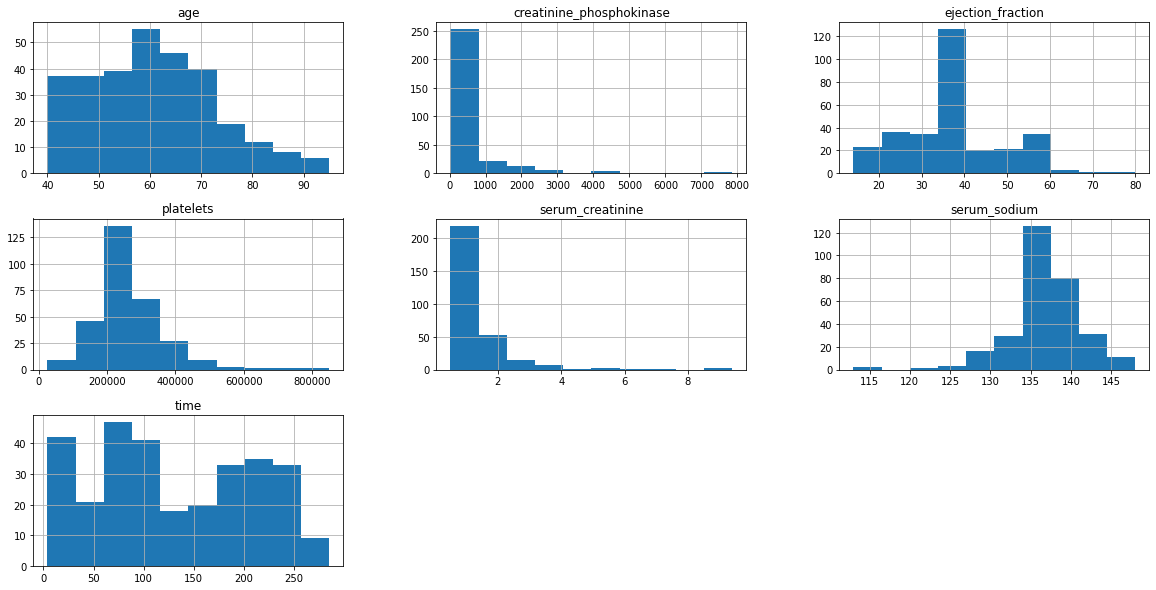

In [ ]:
features=data.columns
data[features].hist(figsize=(20,10))
plt.show()

In [ ]:
df = data['age'].value_counts().reset_index()
df.columns = ['age', 'value_count']

fig = px.pie(
    df, 
    values='value_count', 
    names="age", 
    title='age distribution'
)

fig.show()

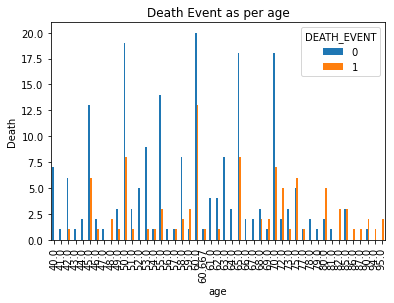

In [ ]:
pd.crosstab(data['age']  ,data['DEATH_EVENT']).plot(kind='bar')
plt.title('Death Event as per age')
plt.xlabel('age')
plt.ylabel('Death')
plt.show()

In [ ]:
df = data['anaemia'].value_counts().reset_index()
df.columns = ['anaemia', 'anaemia_count']

fig = px.pie(
    df, 
    values='anaemia_count', 
    names="anaemia", 
    title='anaemia distribution'
)

fig.show()

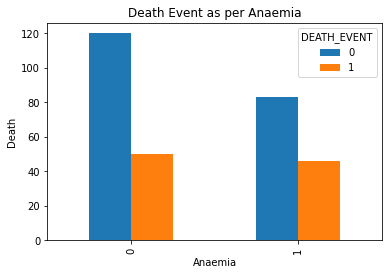

In [ ]:
pd.crosstab(data['anaemia']  ,data['DEATH_EVENT']).plot(kind='bar')
plt.title('Death Event as per Anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

In [ ]:
df = data['diabetes'].value_counts().reset_index()
df.columns = ['diabetes', 'diabetes_count']

fig = px.pie(
    df, 
    values='diabetes_count', 
    names="diabetes", 
    title='diabetes distribution'
)

fig.show()

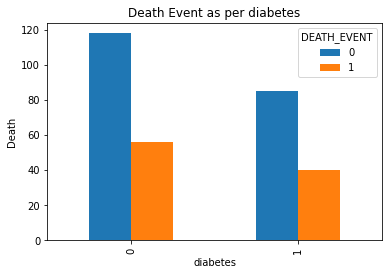

In [ ]:
pd.crosstab(data['diabetes']  ,data['DEATH_EVENT']).plot(kind='bar')
plt.title('Death Event as per diabetes')
plt.xlabel('diabetes')
plt.ylabel('Death')
plt.show()

In [ ]:
df = data['high_blood_pressure'].value_counts().reset_index()
df.columns = ['high_blood_pressure', 'hbp_count']

fig = px.pie(
    df, 
    values='hbp_count', 
    names="high_blood_pressure", 
    title='high_blood_pressure distribution'
)

fig.show()

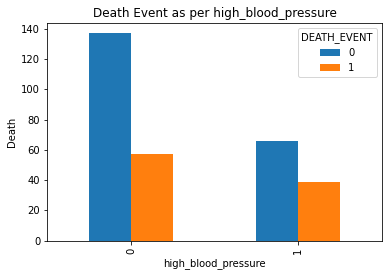

In [ ]:
pd.crosstab(data['high_blood_pressure']  ,data['DEATH_EVENT']).plot(kind='bar')
plt.title('Death Event as per high_blood_pressure')
plt.xlabel('high_blood_pressure')
plt.ylabel('Death')
plt.show()

In [ ]:
df = data['sex'].value_counts().reset_index()
df.columns = ['gender', 'gender_count']

fig = px.pie(
    df, 
    values='gender_count', 
    names="gender", 
    title='gender distribution'
)

fig.show()

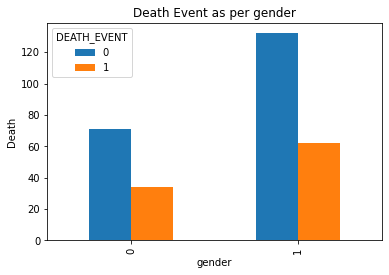

In [ ]:
pd.crosstab(data['sex']  ,data['DEATH_EVENT']).plot(kind='bar')
plt.title('Death Event as per gender')
plt.xlabel('gender')
plt.ylabel('Death')
plt.show()

In [ ]:
df = data['smoking'].value_counts().reset_index()
df.columns = ['smoking', 'sm_count']

fig = px.pie(
    df, 
    values='sm_count', 
    names="smoking", 
    title='smoking distribution'
)

fig.show()

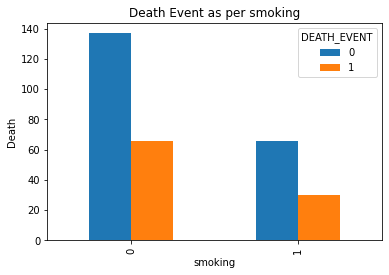

In [ ]:
pd.crosstab(data['smoking']  ,data['DEATH_EVENT']).plot(kind='bar')
plt.title('Death Event as per smoking')
plt.xlabel('smoking')
plt.ylabel('Death')
plt.show()

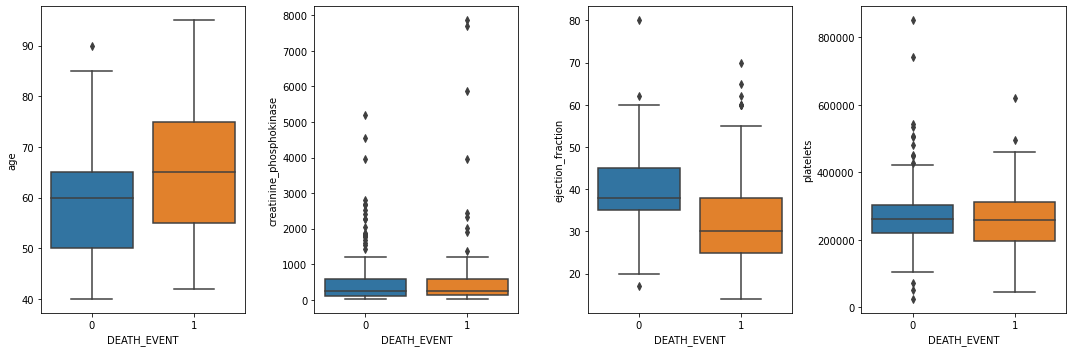

In [ ]:
#detecting outlier
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
title = list(data.select_dtypes(exclude='category'))

titlepairs = zip(axs.flat, title)

for ax, title in titlepairs:
    sns.boxplot(x='DEATH_EVENT', y=title, data=data, ax=ax)
fig.tight_layout()

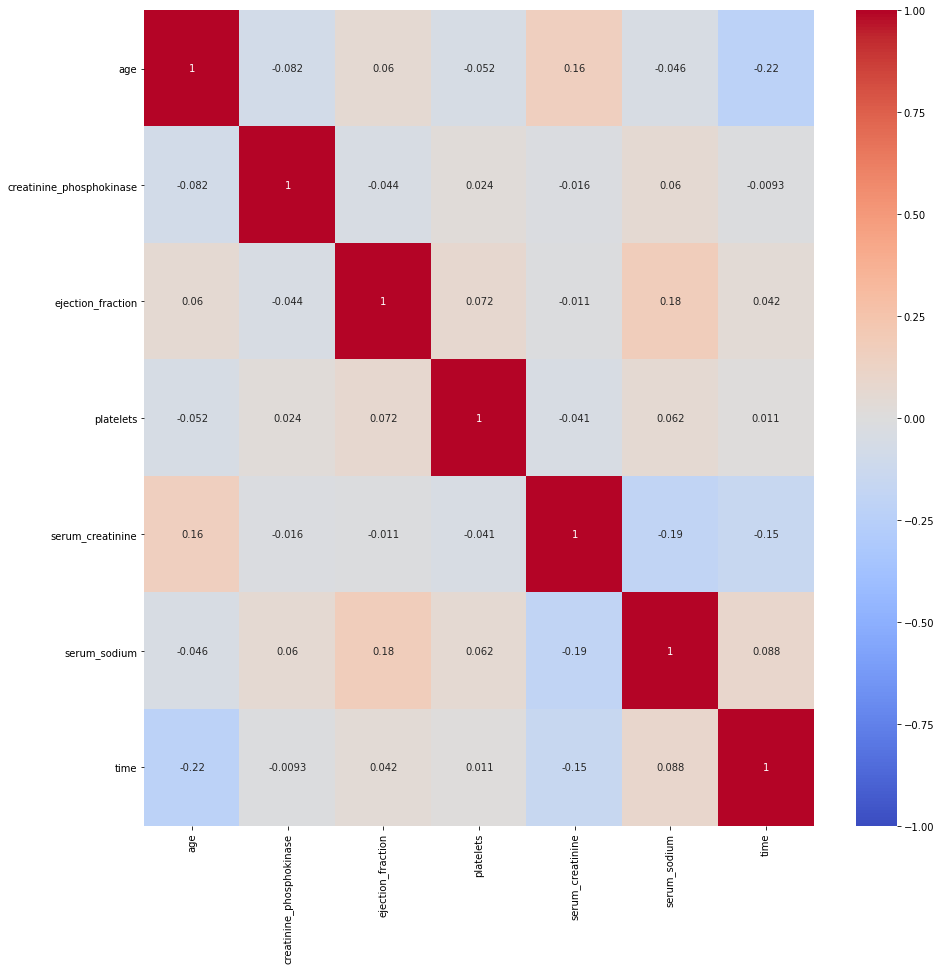

In [ ]:
#correlation heatmap
correlation_matrix = data.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, vmin=-1, cmap='coolwarm', annot=True)
plt.show()